### Titanic Dataset ###
## Descripción:
El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien había algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este reto, te pedimos que construyas un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando los datos de los pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

## Agradecimientos:
Este conjunto de datos ha sido referido desde Kaggle: https://www.kaggle.com/c/titanic/data.


## Objetivo:
- Comprenda el conjunto de datos y la limpieza (si es necesario).
- Construya un modelo de clasificación sólido para predecir si el pasajero sobrevive o no.
- También ajuste los hiperparámetros y compare las métricas de evaluación de varios algoritmos de clasificación.

In [120]:
import pandas as pd
import numpy as np 

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [121]:
titanic = pd.read_csv(r'C:\Users\maria\Documents\FormacionDataAnalytics\EDA Titanic\Titanic-Dataset.csv')

In [122]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Descripción de campos ###
- 'PassengerId':  ID del pasajero

- 'Survived':  Campo binario, descrive la supervivencia del pasajero 1= YES , 0= NO

- 'Pclass':  Ticket Class: 1= 1st; 2= 2nd; 3= 3rd

- 'Name':  Nombre del pasajero

- 'Sex':  Sexo del pasajero, male/female

- 'Age':  Edad

- 'SibSp':  Nº de hermanos/conyuges a bordo

- 'Parch':  Nº de padres/hijos a bordo

- 'Ticket': Nº de ticket

- 'Fare':  Tarifa por pasajero

- 'Cabin':  Número de cabina

- 'Embarked':  Puesta de embarque, C= Cherbourg, Q= Queenstown, S= Sounthampton.

In [125]:
print(f"Las dimensione del Dataset nos dice que hay {titanic.shape[0]} filas, que nos habla del número de pasajeros que hay registrados en la base de datos y {titanic.shape[1]} de columnas con datos sobre esos pasajeros.")

Las dimensione del Dataset nos dice que hay 891 filas, que nos habla del número de pasajeros que hay registrados en la base de datos y 12 de columnas con datos sobre esos pasajeros.


Para comenzar a entender los datos se realizan varias medidas para ver las primeras impresiones por sexo, edad, clases economica.

In [126]:
titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [127]:
# Visualizamos el porcentaje de nulos para empezar a trabajar sobre ellos.
titanic.isnull().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Gestión de Nulos
en esta primera fase de conocimiento y limpieza del set se realizara una gestión de los nulos. Se describe brevemente la conclusión inicial para trabajarlos.
Campo 'Cabin', teniendo en cuenta no es relevante para la clasificación que nos piden se creara una cateoría nueva y se sustituran por 'Unknown'.
Embarket: nos pasa algo similar al campo anterio. Podría eliminarlo del set, pero en este caso se van a sustituir por la moda. Se toma esta decisión por el porcentaje bajo y la poca relevancia para el análisis.
Campo 'Age': se procedera a realiza una compartiva de diferentes medidas de sustitucion par ver cual es la mas acertada.

In [128]:
# La columan Cabin no es representativa para hacer el análisis que nos piden. Por ello se decide rellenar los nulos ocn una nueva categoría 'Desconocido'.
titanic['Cabin']=titanic['Cabin'].fillna('Unknown')


In [129]:
# En la gestión de nulos de la columna Embarket se ha decido utilizar la moda para sustituir a los nulos, el porcentaje es muy pequeño y no hay 
moda= titanic['Embarked'].mode()
titanic['Embarked']=titanic['Embarked'].fillna('moda')

In [130]:

fig = px.box(titanic['Age'])

fig.show()

In [131]:
titanic_imputer = pd.DataFrame(titanic['Age'])
imputer_knn= KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(titanic_imputer)
titanic_imputer['age_knn']= imputer_knn_imputado

In [132]:
titanic_imputer

,Age,age_knn
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [133]:
imputer_iterative = IterativeImputer(max_iter=20, random_state=42 )
imputer_iterative_imputado = imputer_iterative.fit_transform(titanic_imputer)
titanic_imputer['age_imp'] = imputer_iterative_imputado[:, :1]


In [134]:
titanic_imputer.describe()

,Age,age_knn,age_imp
count,714.000000,891.000000,891.000000
mean,29.699118,29.699118,29.699118
std,14.526497,13.002015,13.002015
min,0.420000,0.420000,0.420000
25%,20.125000,22.000000,22.000000
50%,28.000000,29.699118,29.699118
75%,38.000000,35.000000,35.000000
max,80.000000,80.000000,80.000000


Tras comprarar las dos opciones de sustitución de los nulos en el campo Age, resolvemos los nulos con el algoritmo Iterative Imputer (se considera modelso mas completo). el resultado es excatmenten el mismo y sin nos convence porque la desviación estandar es menor.


In [135]:
# Procedemos a la sustitucion por el método Iterative Imputer.

titanic['Age']= titanic_imputer['age_imp']

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Para seguir conociemo mejor el set de datos se realizaran diferentes gráficos para ver mejor la relación de los supervivientes en funcio del sexo, edad y el ticket class. 

In [137]:
diccionario_booleanos ={0:'no', 1:'si'}
titanic['Survived']=titanic['Survived'].map(diccionario_booleanos)

In [138]:
# Primero de todo visualizar la cantidad de supervivientes

pie_df= titanic.groupby('Survived')['PassengerId'].count().reset_index()
pie = px.pie(pie_df, values='PassengerId', names= 'Survived', color = ['no','yes'],
             color_discrete_map = {'yes':'#489C9E','no':'#495084'})
pie.update_layout(title = dict(text = "Distribución de Supervivientes DataSet Titanic",
															 font = dict(size = 20),
															 automargin = True,
															 yref = 'paper',
															 x = 0.5,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
pie

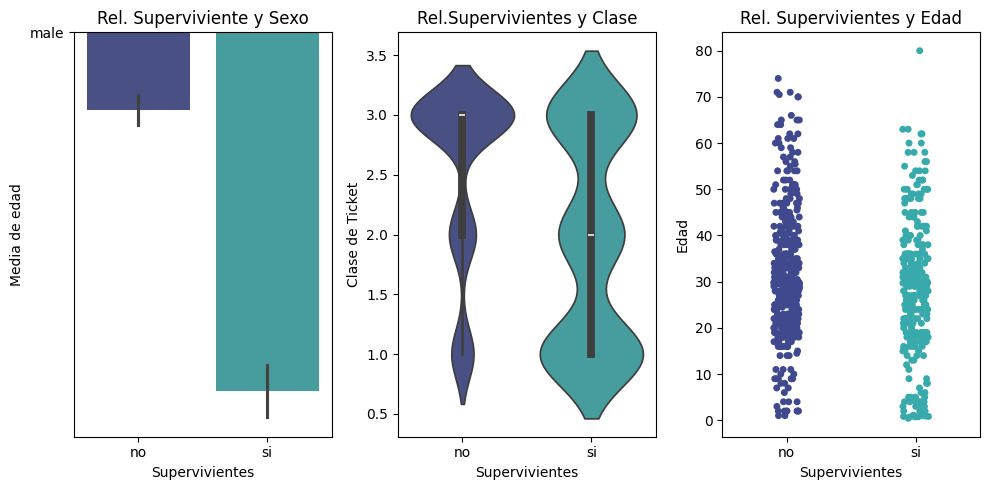

In [144]:
fig, axes= plt.subplots(nrows=1, ncols=3, figsize= (10,5))

sns.barplot(x="Survived", y ="Sex", data=titanic, ax= axes[0], hue="Survived", legend=False, palette="mako")
axes[0].set_xlabel('Supervivientes')
axes[0].set_ylabel('Media de edad')
axes[0].set_title('Rel. Superviviente y Sexo')

sns.violinplot(x="Survived", y ="Pclass", data= titanic, ax= axes[1], hue="Survived", legend=False, palette="mako")
axes[1].set_xlabel('Supervivientes')
axes[1].set_ylabel('Clase de Ticket')
axes[1].set_title('Rel.Supervivientes y Clase')

sns.stripplot(x="Survived", y ="Age", data=titanic, ax= axes[2], hue="Survived", legend=False, palette="mako")
axes[2].set_xlabel('Supervivientes')
axes[2].set_ylabel('Edad')
axes[2].set_title('Rel. Supervivientes y Edad')

plt.tight_layout()
plt.show()


Conclusiones de esta visualización es:
- Destaca la supervivencia de las mujeres frente a los hombres
- La distribucuión de las clases nos indica que los pasajeros de 3ar clase estaban en desventaja y hay una clara marca de fallecimientos
- La distribución de la edad no es la mas 